# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re

# Import Data

In [4]:
plt_=pd.read_csv('PLT.csv')
print(plt_.shape)
plt_.drop(columns=['Name'], inplace=True)
plt_.head()

(167, 5)


,Pre Test,Post Test,Experimental\nGroup,Delta
0,3,7,0,4.0
1,4,5,0,1.0
2,4,5,0,1.0
3,6,6,0,0.0
4,3,7,0,4.0


# Data Cleaning

## Null Values

### Number of Null Values

Null values represent absentees

In [5]:
plt_.isnull().sum()

Pre Test               14
Post Test              15
Experimental\nGroup     0
Delta                  11
dtype: int64

### Removing Null Values

There are very few absentees, so I can drop all rows with Null values

In [6]:
plt_.dropna()

,Pre Test,Post Test,Experimental\nGroup,Delta
0,3,7,0,4.0
1,4,5,0,1.0
2,4,5,0,1.0
3,6,6,0,0.0
4,3,7,0,4.0
...,...,...,...,...
156,0,0,0,0.0
161,0,2,0,2.0
162,0,1,0,1.0
163,2,5,0,5.0


In [7]:
for i in plt_['Pre Test']:
    try:
        int(i)
    except:
        print(i)

nan
nan
abs
abs
abs
abs
ABS
ABS
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [8]:
for i in plt_['Post Test']:
    try:
        int(i)
    except:
        print(i)

nan
nan
nan
Abs
Abs
ABS
ABS
ABS
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [9]:
plt_=plt_.replace({'nan':np.nan,'ABS':np.nan,'Abs':np.nan,'abs':np.nan })

In [10]:
plt_

,Pre Test,Post Test,Experimental\nGroup,Delta
0,3,7,0,4.0
1,4,5,0,1.0
2,4,5,0,1.0
3,6,6,0,0.0
4,3,7,0,4.0
...,...,...,...,...
162,0,1,0,1.0
163,2,5,0,5.0
164,NaN,NaN,0,0.0
165,NaN,NaN,0,0.0


In [11]:
plt_.isnull().sum()

Pre Test               20
Post Test              20
Experimental\nGroup     0
Delta                  11
dtype: int64

In [12]:
plt_=plt_.dropna()

In [13]:
plt_.isnull().sum()

Pre Test               0
Post Test              0
Experimental\nGroup    0
Delta                  0
dtype: int64

## Column Cleaning

### Check Column Datatypes

In [14]:
plt_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 166
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pre Test            141 non-null    object 
 1   Post Test           141 non-null    object 
 2   Experimental
Group  141 non-null    int64  
 3   Delta               141 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.5+ KB


In [15]:
plt_.isnull().sum()

Pre Test               0
Post Test              0
Experimental\nGroup    0
Delta                  0
dtype: int64

### Rename Columns

In [16]:
plt_.rename(columns={"Pre Test":"Pre","Post Test":"Post","Experimental\nGroup":"Intervention"}, inplace=True)
plt_.head()

C:\Users\redoc\AppData\Local\Temp\ipykernel_115892\884722248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_.rename(columns={"Pre Test":"Pre","Post Test":"Post","Experimental\nGroup":"Intervention"}, inplace=True)


,Pre,Post,Intervention,Delta
0,3,7,0,4.0
1,4,5,0,1.0
2,4,5,0,1.0
3,6,6,0,0.0
4,3,7,0,4.0


### Drop Name Column

In [19]:
plt_.head()

,Pre,Post,Intervention,Delta
0,3,7,0,4.0
1,4,5,0,1.0
2,4,5,0,1.0
3,6,6,0,0.0
4,3,7,0,4.0


### Export Data to New CSV

In [20]:
plt_.to_csv('cleaned.csv')

### Change Datatypes to Integers

In [21]:
plt_=plt_.astype(int)


In [22]:
plt_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 166
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pre           141 non-null    int32
 1   Post          141 non-null    int32
 2   Intervention  141 non-null    int32
 3   Delta         141 non-null    int32
dtypes: int32(4)
memory usage: 3.3 KB


In [23]:
spare = plt_

In [24]:
plt_ = pd.get_dummies(columns=['Intervention'], data = plt_ )
plt_=plt_.astype(int)

plt_.head()

,Pre,Post,Delta,Intervention_0,Intervention_1
0,3,7,4,1,0
1,4,5,1,1,0
2,4,5,1,1,0
3,6,6,0,1,0
4,3,7,4,1,0


In [25]:
plt_.corr()

,Pre,Post,Delta,Intervention_0,Intervention_1
Pre,1.000000,0.673580,-0.438126,0.340929,-0.340929
Post,0.673580,1.000000,0.345212,0.530123,-0.530123
Delta,-0.438126,0.345212,1.000000,0.238048,-0.238048
Intervention_0,0.340929,0.530123,0.238048,1.000000,-1.000000
Intervention_1,-0.340929,-0.530123,-0.238048,-1.000000,1.000000


# Data Visualization

In [26]:
plt_.head()

,Pre,Post,Delta,Intervention_0,Intervention_1
0,3,7,4,1,0
1,4,5,1,1,0
2,4,5,1,1,0
3,6,6,0,1,0
4,3,7,4,1,0


In [27]:
plt_.corr()

,Pre,Post,Delta,Intervention_0,Intervention_1
Pre,1.000000,0.673580,-0.438126,0.340929,-0.340929
Post,0.673580,1.000000,0.345212,0.530123,-0.530123
Delta,-0.438126,0.345212,1.000000,0.238048,-0.238048
Intervention_0,0.340929,0.530123,0.238048,1.000000,-1.000000
Intervention_1,-0.340929,-0.530123,-0.238048,-1.000000,1.000000


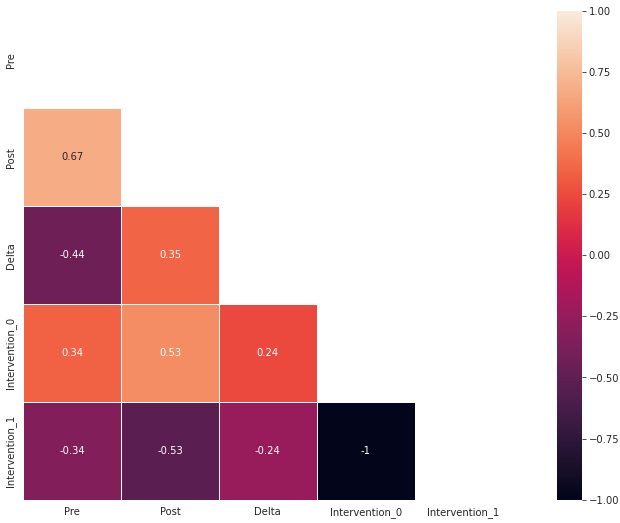

In [28]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = plt_.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr) # https://www.geeksforgeeks.org/numpy-zeros_like-python/
mask[np.triu_indices_from(mask)] = True # https://stackoverflow.com/questions/53822194/python-generate-a-mask-for-the-lower-triangle-of-a-matrix 

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

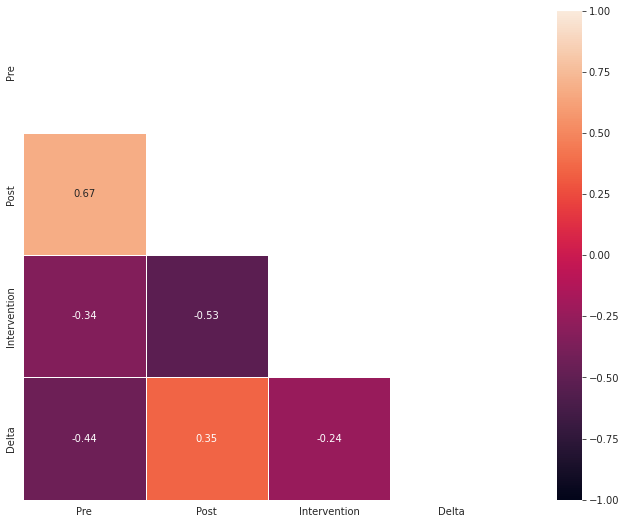

In [29]:
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = spare.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr) # https://www.geeksforgeeks.org/numpy-zeros_like-python/
mask[np.triu_indices_from(mask)] = True # https://stackoverflow.com/questions/53822194/python-generate-a-mask-for-the-lower-triangle-of-a-matrix 

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

(array([22., 26., 18.,  0., 11., 14.,  0.,  5., 14.,  7.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

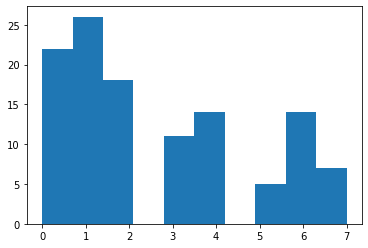

In [30]:
plt.hist(plt_[plt_['Intervention_0'] == 1]['Pre'])


(array([ 1.,  4., 12.,  0., 12., 11.,  0., 25., 20., 32.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

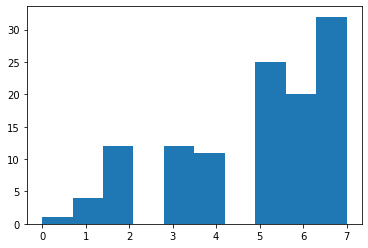

In [31]:
plt.hist(plt_[plt_['Intervention_0'] == 1]['Post'])


(array([11.,  0.,  0., 11.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

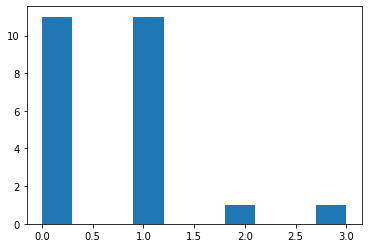

In [32]:
plt.hist(plt_[plt_['Intervention_1'] == 1]['Pre'])


(array([3., 7., 0., 7., 0., 4., 2., 0., 0., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

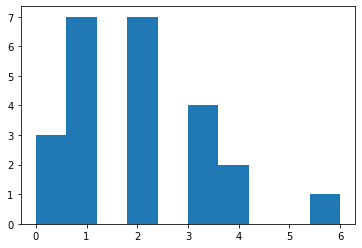

In [33]:
plt.hist(plt_[plt_['Intervention_1'] == 1]['Post'])


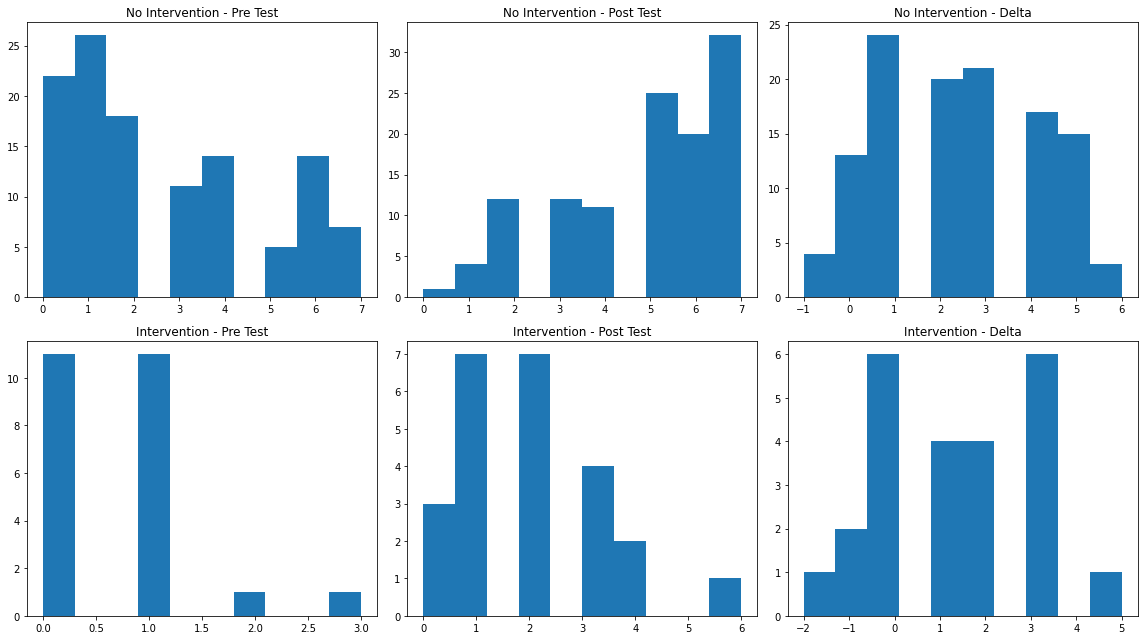

In [34]:
plt.figure(figsize = (16,9))

ax1 = plt.subplot(2, 3, 1) 
ax1.set_title('No Intervention - Pre Test')
ax1.hist(plt_[plt_['Intervention_0'] == 1]['Pre']);

ax2 = plt.subplot(2, 3, 2) 
ax2.set_title('No Intervention - Post Test')
ax2.hist(plt_[plt_['Intervention_0'] == 1]['Post']);

ax3 = plt.subplot(2, 3, 3) 
ax3.set_title('No Intervention - Delta')
ax3.hist(plt_[plt_['Intervention_0'] == 1]['Delta']);
#-----
ax4 = plt.subplot(2, 3, 4) 
ax4.set_title('Intervention - Pre Test')
ax4.hist(plt_[plt_['Intervention_1'] == 1]['Pre']);

ax5 = plt.subplot(2, 3, 5) 
ax5.set_title('Intervention - Post Test')
ax5.hist(plt_[plt_['Intervention_1'] == 1]['Post']);

ax6 = plt.subplot(2, 3, 6) 
ax6.set_title('Intervention - Delta')
ax6.hist(plt_[plt_['Intervention_1'] == 1]['Delta']);

plt.tight_layout() # adds more space